In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/MyDrive/11777_hws/project/github/11777-Project/')

In [3]:
!ls

answers.png  data	get_data.sh  questions.png
common	     file1.txt	language     README.md


In [4]:
!pip install flair

     |████████████████████████████████| 319 kB 8.5 MB/s 
     |████████████████████████████████| 788 kB 48.0 MB/s 
     |████████████████████████████████| 2.9 MB 57.2 MB/s 
     |████████████████████████████████| 48 kB 6.7 MB/s 
     |████████████████████████████████| 64 kB 3.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 1.2 MB 36.3 MB/s 
     |████████████████████████████████| 19.7 MB 5.5 MB/s 
     |████████████████████████████████| 981 kB 38.0 MB/s 
     |████████████████████████████████| 62 kB 977 kB/s 
     |████████████████████████████████| 895 kB 78.3 MB/s 
     |████████████████████████████████| 3.3 MB 49.9 MB/s 
     |████████████████████████████████| 636 kB 57.4 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=c1238779b5b5490fcfa4d0d40671708a26efaa92566ed3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [6]:
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings
from flair.data import *
# initialize the word embeddings
glove_embedding = WordEmbeddings('glove')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding])

2021-10-10 17:03:30,978 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmp_gb56cza


100%|██████████| 160000128/160000128 [00:10<00:00, 15339094.94B/s]

2021-10-10 17:03:41,909 copying /tmp/tmp_gb56cza to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2021-10-10 17:03:42,294 removing temp file /tmp/tmp_gb56cza
2021-10-10 17:03:43,482 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmp6y0261c4


100%|██████████| 21494764/21494764 [00:02<00:00, 8206157.85B/s] 

2021-10-10 17:03:46,595 copying /tmp/tmp6y0261c4 to cache at /root/.flair/embeddings/glove.gensim
2021-10-10 17:03:46,622 removing temp file /tmp/tmp6y0261c4


In [7]:
# # create an example sentence
# sentence = Sentence('The grass is green . And the sky is blue .')

# # embed the sentence with our document embedding
# document_embeddings.embed(sentence)

# # now check out the embedded sentence.
# print(sentence.embedding)

In [8]:
def read_samples(path, n=20):
    questions, true_ans, false_ans = [], [], []
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            if i % 6 == 0:
                questions.append(line.rstrip())
            elif i % 6 == 1:
                true_ans.append(line.rstrip())
            elif i % 6 == 2:
                false_ans.append(line.rstrip())
            if len(false_ans) >= n:
                break
    return questions, true_ans, false_ans




In [9]:
def get_glove_embedding(question):
  sentence = Sentence(question)
  document_embeddings.embed(sentence)
  sentence_embedding= sentence.embedding.numpy()
  return sentence_embedding

In [10]:
categories = ['what', 'why', 'how', 'who', 'when', 'where', 'which']

In [11]:
questions_all = []
true_answers_all = []
false_answers_all = []

In [12]:
 for type_str in categories:
    path = os.path.join('common/tmp/', type_str + '50.txt')
    questions, true_ans, false_ans = read_samples(path)
    questions_all.append(questions)
    true_answers_all.append(true_ans)
    false_answers_all.append(false_ans)



In [13]:
questions_all[0][-1], true_answers_all[0][-1], false_answers_all[0][-1]

("What is on the kid's shirt?", 'A monkey.', 'A robot.')

In [14]:
questions_embeddings = [[get_glove_embedding(q) for q in questions] for questions in questions_all]
true_answers_embeddings = [[get_glove_embedding(ta) for ta in true_answers] for true_answers in true_answers_all]
false_answers_embeddings = [[get_glove_embedding(fa) for fa in false_answers] for false_answers in false_answers_all]

In [15]:
true_embed_all = np.vstack(true_answers_embeddings)
false_embed_all = np.vstack(false_answers_embeddings)

In [16]:
true_embed_all.shape, false_embed_all.shape


((140, 100), (140, 100))

In [17]:
ans_embed_all = np.vstack((true_embed_all, false_embed_all))

In [18]:
questions_embed_all = np.vstack(questions_embeddings)

In [19]:
questions_embed_all.shape

(140, 100)

In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=2, init='random', random_state=0)
features = tsne.fit_transform(questions_embed_all)

In [22]:
features[:20].shape

(20, 2)

In [23]:
labels = np.repeat([0, 1, 2, 3, 4, 5, 6], 20)

In [24]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6])

In [25]:
import pandas as pd
df = pd.DataFrame(labels, columns=['y'])

In [26]:
colors = ['red', 'black', 'blue', 'yellow', 'green', 'orange', 'brown']

In [27]:
df['tsne1'] = features[:, 0]
df['tsne2'] = features[:, 1]

In [28]:
df

,y,tsne1,tsne2
0,0,-6.993002,4.166016
1,0,1.252336,-0.136991
2,0,0.427820,-0.842890
3,0,-7.441066,1.114563
4,0,-7.136569,4.172537
...,...,...,...
135,6,3.273823,0.486352
136,6,4.848640,3.262551
137,6,3.570864,-0.011511
138,6,2.546680,0.268414


In [29]:
import seaborn as sns

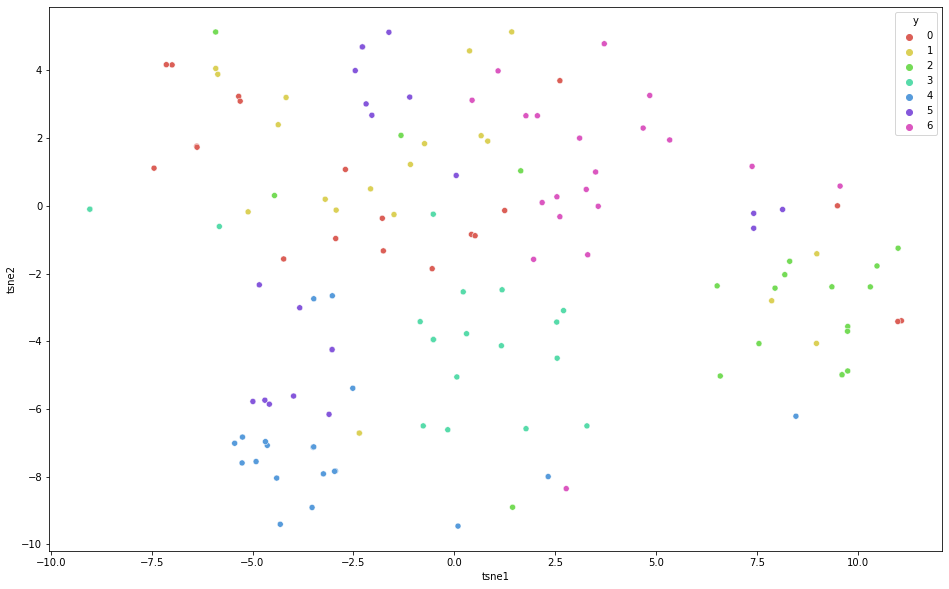

In [30]:
plt.figure(figsize=(16,10))
sns_plot = sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="y",
    palette=sns.color_palette("hls", 7),
    data=df,
    legend="full"
)



In [31]:
sns_plot.figure.savefig("tsne_questions.png")

In [32]:
tsne = TSNE(n_components=2, init='random', random_state=0)
features = tsne.fit_transform(ans_embed_all)

In [33]:
labels = np.repeat([0, 1], 140)

In [34]:
df = pd.DataFrame(labels, columns=['y'])

In [35]:
df['tsne1'] = features[:, 0]
df['tsne2'] = features[:, 1]

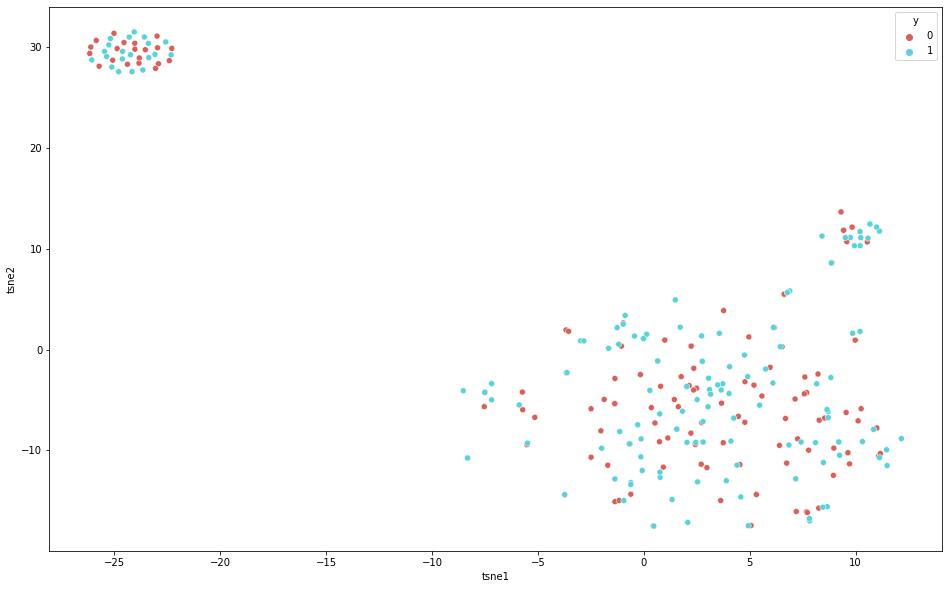

In [36]:
plt.figure(figsize=(16,10))
sns_plot = sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full"
)



In [37]:
sns_plot.figure.savefig("tsne_answers.png")

In [ ]:
##############################################################

In [38]:
!ls

answers.png  data	get_data.sh  questions.png  tsne_answers.png
common	     file1.txt	language     README.md	    tsne_questions.png


In [ ]:
np.savetxt("file1.txt",(sentence_embedding1,sentence_embedding2,sentence_embedding3),newline='\n', delimiter='\t')

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

